# seaborn

## 参考資料
- [seaboan](https://seaborn.pydata.org/index.html)

<a name= "what"></a>

## seabornとは
matplotlibのラッパーライブラリー。

グラフデザインが洗練されている他、複数グラフの同時描写など、便利な機能が多数。


## 使い方

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #snsとするのが一般的
%matplotlib inline

In [48]:
x = np.random.normal(size=100) #ランダムデータをnumpy arrayとして作る

In [49]:
titanic = sns.load_dataset("titanic") ##kaggleで有名な、タイタニック号の生死者データ
tips = sns.load_dataset("tips")  ## お店の食事時間と会計総額とチップの関係のデータ
iris = sns.load_dataset("iris")  ## アヤメの統計データ
df_flights = sns.load_dataset('flights')  ## フライトデータ

### ヒストグラム

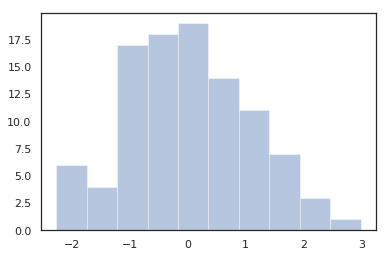

In [50]:
sns.distplot(x, kde=False, rug=False, bins=10) 


## 散布図&ヒストグラム

In [51]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


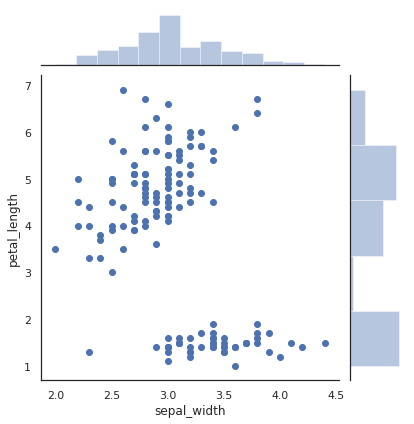

In [52]:
sns.jointplot('sepal_width', 'petal_length', data=iris)


### 相関グラフ

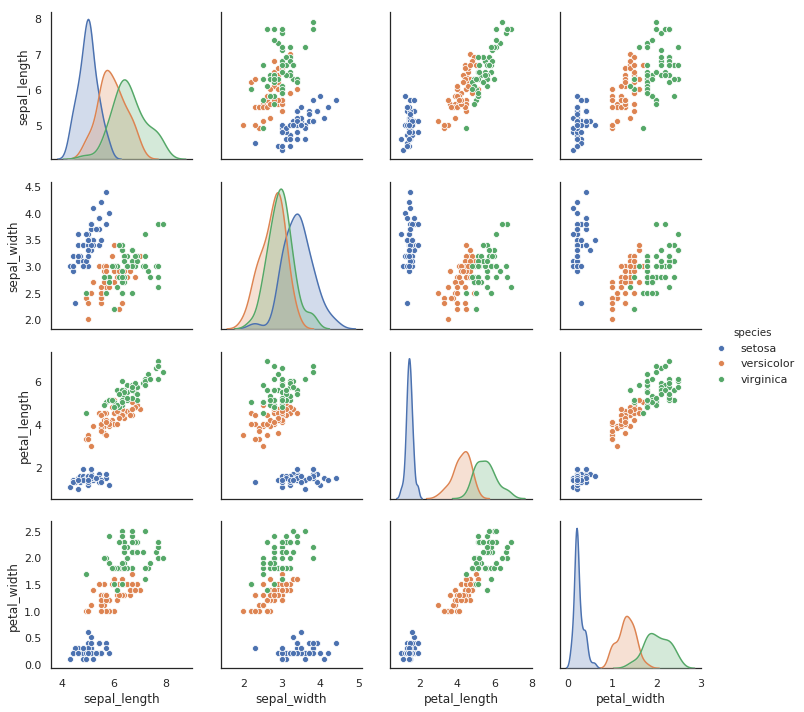

In [53]:
sns.pairplot(iris, hue="species")

### 分布プロット

In [54]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


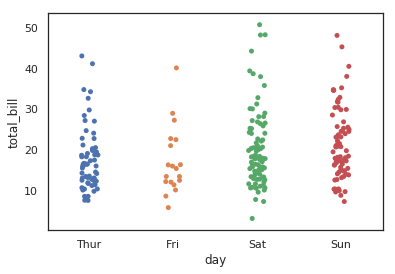

In [55]:
sns.stripplot(x="day", y="total_bill", data=tips)

### 箱ヒゲプロット

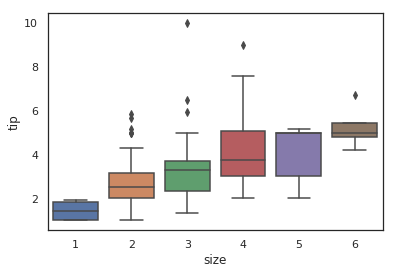

In [56]:
sns.boxplot(x="size", y="tip", data=tips.sort_values(by='size'))


### 棒グラフ

In [57]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


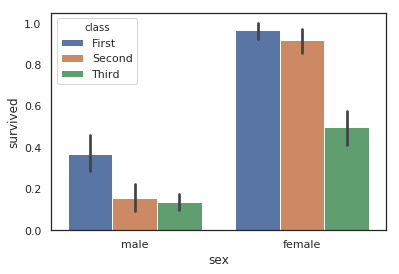

In [58]:
sns.barplot(x='sex', y='survived', data=titanic, hue='class')

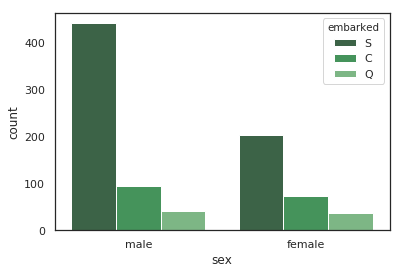

In [59]:
sns.countplot(x='sex', hue='embarked', data=titanic, palette='Greens_d')


### ヒートマップ
年月と乗客数の関係を可視化する

In [60]:
df_flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [61]:
df_flights_pivot = pd.pivot_table(data=df_flights, values='passengers', 
                                  columns='year', index='month', aggfunc=np.mean)

In [62]:
df_flights_pivot.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


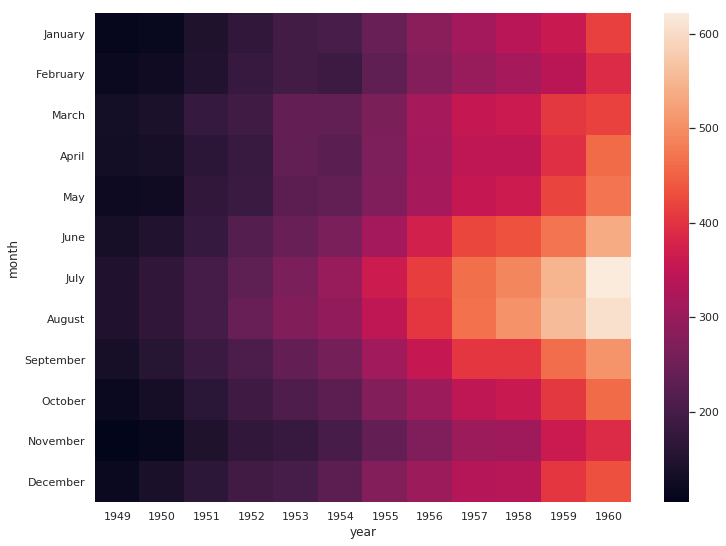

In [63]:
plt.figure(figsize=(12, 9)) # matplotlibと組み合わせられる
sns.heatmap(df_flights_pivot)

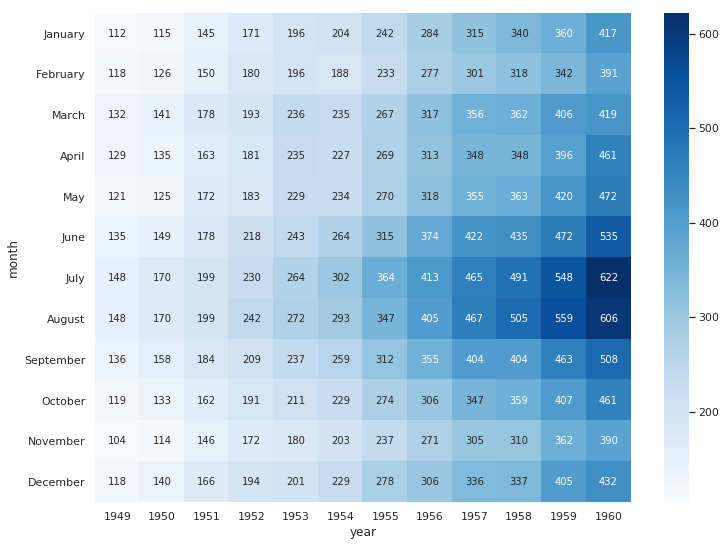

In [64]:
plt.figure(figsize=(12, 9))
# 数字を入れる
sns.heatmap(df_flights_pivot, annot=True, fmt='g', cmap='Blues')

## 様々な可視化

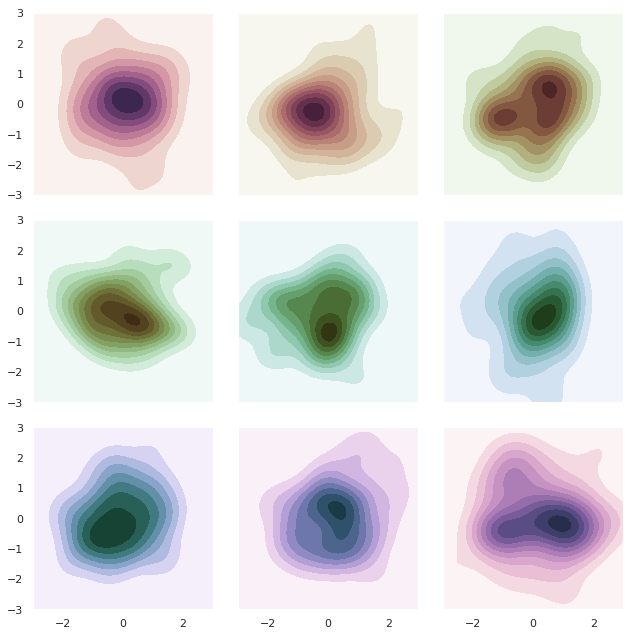

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")
rs = np.random.RandomState(50)

# プロットの設定
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# サブプロットに描写
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # cubehelixカラーマップ
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # カーネル密度推定（kde）プロット
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


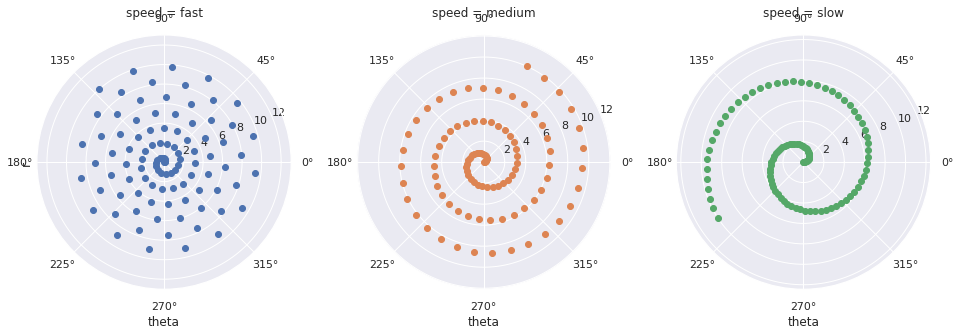

In [66]:
sns.set()

# データ生成
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# dataframeを変形
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# facegridプロット
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), size=4.5,
                  sharex=False, sharey=False, despine=False)

g.map(plt.scatter, "theta", "r")

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


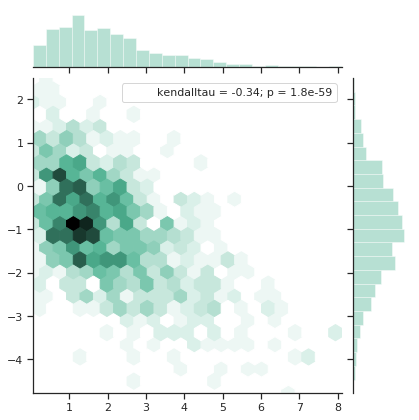

In [67]:
from scipy.stats import kendalltau

sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#4CB391")

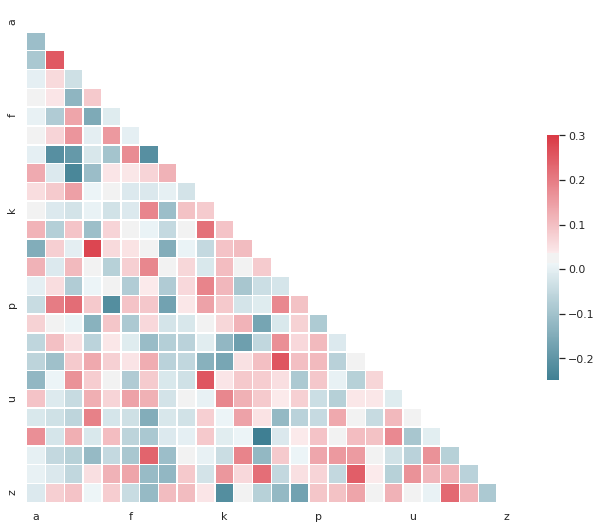

In [68]:
from string import ascii_letters

sns.set(style="white")

# ランダムデータ生成
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[:26]))

# 相関を算出
corr = d.corr()

# マスクを作成
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# matplot.figureを生成
f, ax = plt.subplots(figsize=(11, 9))

# カラーマップ
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# 描画
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)